# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
sz = 256
num_slice = 25

num_gpus = 3
gpu_start = 3
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 7 * num_gpus

In [3]:
model_name = 'deeplab'

In [4]:
data = None

In [5]:
learn, denorm, data = learner_on_dataset(datapaths[3], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=708), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=304), HTML(value='')))


Data finished loading: data/train/AOI_5_Khartoum_Train


In [6]:
learn.load('deeplab-5_0')
learn.unfreeze()

In [13]:
learn.lr_find()
learn.sched.plot()

  0%|          | 0/362 [00:00<?, ?it/s]                      

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

  0%|          | 0/213 [00:00<?, ?it/s]                     


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc                    
    0      0.368461   0.322855   0.854456  
    1      0.341542   0.323199   0.855536                    
    2      0.33015    0.432576   0.832731                    
    3      0.309468   0.275996   0.8795                      
    4      0.300727   0.261658   0.878648                    
    5      0.298073   0.263435   0.879748                    
    6      0.30138    0.261376   0.881917                    
    7      0.297154   0.471762   0.835254                    
    8      0.282376   0.270576   0.882443                    
    9      0.278966   0.255312   0.886976                    
    10     0.275453   0.237862   0.891153                    
    11     0.267814   0.23306    0.893853                    
    12     0.270264   0.236141   0.893117                    
    13     0.264459   0.229375   0.896624                    
    14     0.27849    0.271753   0.882328                    
    15     0.272146   0.33

TypeError: mkdir() got an unexpected keyword argument 'parent'

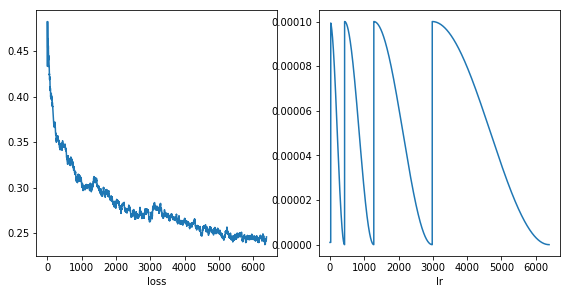

In [16]:
%%time
lr = 1e-4
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-5', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-5')

HBox(children=(IntProgress(value=0, description='Epoch', max=62), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc                    
    0      0.246224   0.204177   0.909454  
    1      0.241396   0.283199   0.882517                    
    2      0.244631   0.252849   0.891415                    
    3      0.250693   0.206008   0.909208                    
    4      0.240931   0.210588   0.906349                    
    5      0.238993   0.203411   0.910105                    
    6      0.239146   0.201179   0.91117                     
    7      0.239586   0.206427   0.906271                    
    8      0.241422   0.210187   0.905512                    
    9      0.239261   0.209062   0.906313                    
    10     0.242341   0.208648   0.906991                    
    11     0.238792   0.216398   0.901955                    
    12     0.244132   0.236811   0.898318                    
    13     0.240027   0.211835   0.905972                    
    14     0.241755   0.204899   0.910206                    
    15     0.238163   0.21

TypeError: mkdir() got an unexpected keyword argument 'parent'

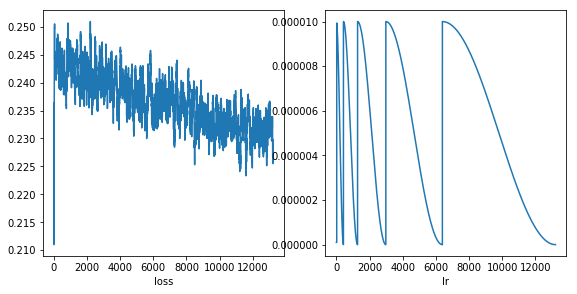

In [17]:
%%time
lr = 1e-5
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-5', lrs=lrs, n_cycles=5, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-5')

In [ ]:
%%time
lr = 1e-5 / 2
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 1, 'deeplab-5', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-5')

HBox(children=(IntProgress(value=0, description='Epoch', max=62), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc                    
    0      0.224729   0.193564   0.163335  
    1      0.229382   0.1972     0.163335                    
    2      0.234841   0.188727   0.163335                    
    3      0.226994   0.193893   0.163335                    
    4      0.231081   0.188377   0.163335                    
    5      0.23109    0.19235    0.163335                    
 41%|████▏     | 349/843 [07:48<11:02,  1.34s/it, loss=0.228]    10     0.224859   0.188176   0.163335  
    11     0.226732   0.184364   0.163335                    
    12     0.227841   0.191358   0.163335                    
 91%|█████████ | 768/843 [17:25<01:42,  1.36s/it, loss=0.222]